### Removing features without variance

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Dimension Reduction in Python/pokemon.csv')

In [12]:
pokemon_df = data[['HP', 'Attack', 'Defense', 'Generation', 'Name', 'Type 1', 'Legendary']][0:160]

In [13]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense', 'Generation']
pokemon_df[number_cols].describe()

,HP,Attack,Defense,Generation
count,160.000000,160.000000,160.000000,160.0
mean,64.725000,74.712500,70.268750,1.0
std,27.917883,28.827701,28.880086,0.0
min,10.000000,5.000000,5.000000,1.0
25%,45.000000,52.000000,50.000000,1.0
50%,60.000000,71.000000,65.000000,1.0
75%,80.000000,95.000000,85.000000,1.0
max,250.000000,155.000000,180.000000,1.0


In [14]:
# remove 'Generation
number_cols = ['HP', 'Attack', 'Defense']

In [15]:
# Leave this list as is for now
non_number_cols = ['Name', 'Type 1', 'Legendary']

# Sub-select by combining the lists with chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name Type 1  Legendary
0  45      49       49              Bulbasaur  Grass      False
1  60      62       63                Ivysaur  Grass      False
2  80      82       83               Venusaur  Grass      False
3  80     100      123  VenusaurMega Venusaur  Grass      False
4  39      52       43             Charmander   Fire      False


In [16]:
pokemon_df[non_number_cols].describe()

,Name,Type 1,Legendary
count,160,160,160
unique,160,15,2
top,Bulbasaur,Water,False
freq,1,31,157


In [17]:
# Remove 'Legendary'
non_number_cols = ['Name', 'Type']

### Visually detecting redundant features

In [43]:
data1 = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Dimension Reduction in Python/ANSUR_II_MALE.csv')
data2 = pd.read_csv('/Users/xingkaiwu/Library/CloudStorage/OneDrive-YorkUniversity/MBAN Winter/MBAN 6400/Dimension Reduction in Python/ANSUR_II_FEMALE.csv')
ansur_df_0 = pd.concat([data1[0:100],data2[0:100]],ignore_index=True)
ansur_df_1=ansur_df_0.copy()[['Gender', 'weight_kg', 'stature_m']]
ansur_df_1['body_height']=ansur_df_1['stature_m']*39.37


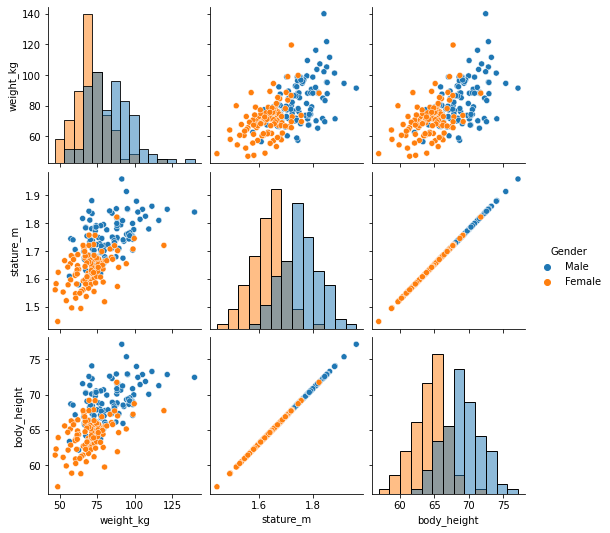

In [45]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

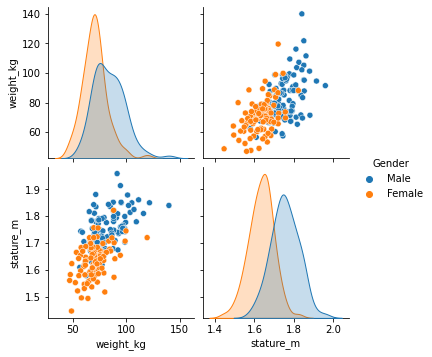

In [46]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop(['body_height'], axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

In [47]:
ansur_df_2=ansur_df_0.copy()[['Gender', 'footlength', 'headlength']]
ansur_df_2['n_legs'] = 2

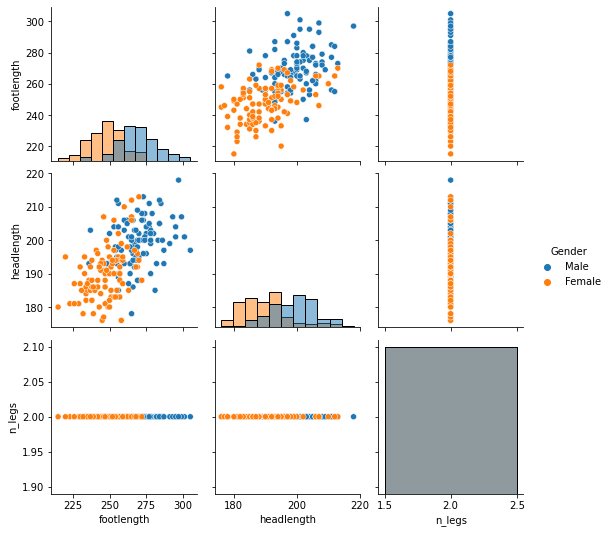

In [48]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')


# Show the plot
plt.show()

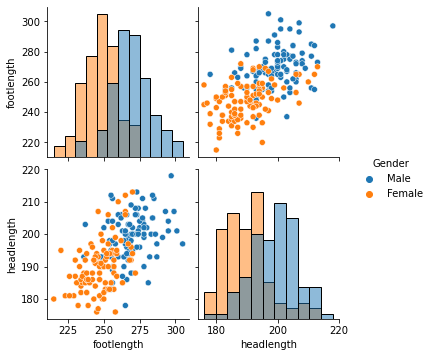

In [49]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop(['n_legs'], axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

### Fitting t-SNE to the ANSUR data

In [51]:
df = pd.concat([data1,data2],ignore_index=True)

In [54]:
df = df.drop(columns =['weight_kg', 'stature_m', 'BMI', 'BMI_class', 'Height_class'])

In [67]:
from sklearn.manifold import TSNE
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

/Users/xingkaiwu/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(6068, 2)


In [68]:
x = [item[0] for item in tsne_features]
y = [item[1] for item in tsne_features]
df['x'] = x
df['y'] = y

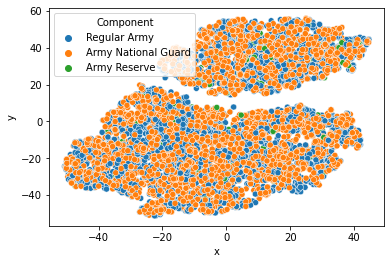

In [69]:

# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

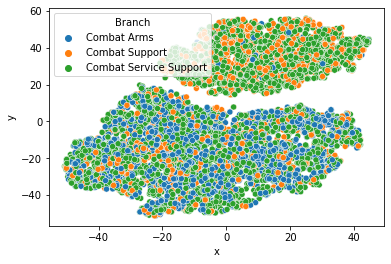

In [70]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

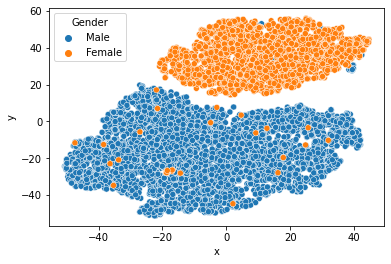

In [71]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()